####################################################################
### A2: Regression Model Development (Individual)
### Won Seok Hur
### Data set: Apprentice_Chef_Dataset_2023
######################################################################

In [1]:
# Import necessary libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling

# Set display options to view all columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read in data from Excel file
data = pd.read_excel('Apprentice_Chef_Dataset_2023.xlsx')

# Display the data
data

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.000,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.000,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.000,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.000,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.500,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,2940.000,Wat (Barleycorn),wat.(barleycorn)@live.com,Wat,NaN,89,6,13,3,143.0,1,5,2,8,0,53.00,5,2.894737,16
1942,7087.500,Hendry Bracken,hendry.bracken@exxon.com,Hendry,Bracken,155,7,13,9,169.4,0,6,2,0,8,39.00,5,2.631579,302
1943,6562.500,Aenys I Targaryen,aenys.i.targaryen@passport.com,Aenys,I Targaryen,65,9,13,6,187.4,1,5,1,0,9,48.00,6,2.631579,310
1944,5355.000,Leo Blackbar,leo.blackbar@pg.com,Leo,Blackbar,58,9,18,10,238.5,3,6,1,0,0,31.00,6,2.631579,275


In [2]:
# look in to the data
data.describe()

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,74.634121,6.983556,4.904933,5.383864,150.556578,1.570915,5.515930,1.476362,11.329908,2.053443,99.604651,4.437307,3.554795,113.151593
std,1138.290709,55.309782,2.281193,2.502175,3.044001,49.447180,1.611130,0.580757,0.527600,13.573303,3.788933,62.341756,1.549666,0.614178,177.152284
min,131.000000,11.000000,1.000000,1.000000,1.000000,33.400000,0.000000,4.000000,0.000000,0.000000,0.000000,10.330000,1.000000,1.315789,1.000000
25%,1350.000000,39.000000,5.000000,3.000000,3.000000,114.400000,0.000000,5.000000,1.000000,1.000000,0.000000,72.000000,3.000000,3.157895,10.000000
50%,1740.000000,60.000000,7.000000,5.000000,5.000000,145.600000,1.000000,6.000000,1.000000,7.000000,0.000000,94.160000,4.000000,3.421053,17.000000
75%,2670.000000,95.000000,8.000000,7.000000,8.000000,173.775000,2.000000,6.000000,2.000000,13.000000,3.000000,117.287500,5.000000,3.947368,174.000000
max,8793.750000,493.000000,18.000000,19.000000,10.000000,564.200000,13.000000,7.000000,3.000000,52.000000,18.000000,1645.600000,11.000000,5.000000,1600.000000


In [3]:
# check if there is a null value or data type issues
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

### Feature Engnieering: Part 1


##### The purpose of creating new columns in the data set is to incorporate new information that can be used to improve the predictive power of a linear regression model for revenue. The new columns can be created by combining existing columns or by creating new variables that capture information that is not present in the original columns. The goal of this process is to increase the number of relevant features that can be used to explain the variation in revenue.

#####  One of the new columns created in the data set is "total_LOGINS". This column combines the number of PC logins and mobile logins for each customer. This new feature provides a comprehensive picture of the customer's engagement with the company's platform. It is reasonable to assume that customers who log in more frequently are more likely to generate more revenue, as they are more engaged with the company's services. By combining these two columns into one, the total logins feature captures this information in a more meaningful way.

#####  Another new feature created in the data set is "total_TIME_VISIT". This column is calculated by multiplying the average time per site visit by the total logins. This feature is designed to capture the total time that a customer spends on the company's platform. It is reasonable to assume that customers who spend more time on the platform are more likely to purchase more products or services, leading to higher revenue.

#####  The "meals_order" column is created by dividing the total meals ordered by the average number of meals. This feature provides information on the customer's meal ordering behavior. It is reasonable to assume that customers who order more meals are more likely to generate more revenue for the company.

#####  The "weekly_plan_days" column is created by multiplying the number of weeks a customer subscribed to the weekly plan discount promotion by 7. This feature captures information about the customer's engagement with the company's promotional activities. It is reasonable to assume that customers who participate in these promotions are more likely to generate more revenue, as they are more engaged with the company's offerings.

#####  The "nomal_order" column is created by subtracting the unique meals purchased from the total meals ordered. This feature provides information on the customer's meal ordering behavior. It is reasonable to assume that customers who order a greater number of non-unique meals are more likely to generate more revenue, as they are more engaged with the company's offerings.

#####  The "photo_viewed_visit" column is created by dividing the total photos viewed by the average time per site visit. This feature provides information on the customer's engagement with the company's product information. It is reasonable to assume that customers who view more photos per visit are more likely to purchase more products or services, leading to higher revenue.

#####  The "num_photo_lead_order" column is created by dividing the total meals ordered by the total photos viewed. This feature provides information on the relationship between the customer's product viewing behavior and their meal ordering behavior. It is reasonable to assume that customers who order more meals for every photo viewed are more likely to generate more revenue for the company.

##### The "photo_viewed_cat" and "time_spent_cat" columns are created by dividing the total photos viewed and the average time per site visit by the number of product categories viewed, respectively. These features provide information on the customer's engagement with the company's product information. It is reasonable to assume that customers who view more photos and spend more time per product category are more likely to purchase more products or services, leading to higher revenue.

#####  Finally, the "one_time_purchase" column is created by dividing the total meals ordered by the average

In [4]:
# transforming y variable to log_yvariable
data['log_REVENUE'] = np.log(data['REVENUE'])

# fixing the space in late deliveries colunm
data['LATE_DELIVERIES']= data['LATE_DELIVERIES ']
# fixing the mislabeled colunm
data['AVERAGE_NUMBER_MEALS'] = data['LARGEST_ORDER_SIZE']

In [5]:

# adding a colunm total logins: number of pc login + mobile login
column_names = ['PC_LOGINS', 'MOBILE_LOGINS']
data["total_LOGINS"]= data[column_names].sum(axis=1)

# adding a colunm total time visit: average time per visit x total login
data['total_TIME_VISIT'] = data['AVG_TIME_PER_SITE_VISIT'] * data['total_LOGINS']

# adding a colunm meals order: total_meals_ordered / AVERAGE_NUMBER_MEALS
data['meals_order'] = data['TOTAL_MEALS_ORDERED']/data['AVERAGE_NUMBER_MEALS']

# Number of weeks customer subscribed to the weekly plan discount promotion in days
data['weekly_plan_days'] = data['WEEKLY_PLAN']*7

# adding a colunm total nomal_order: total meals order - unique meals
data['nomal_order'] = data['TOTAL_MEALS_ORDERED'] - data['UNIQUE_MEALS_PURCH']

# Adding a new column 'photo_viewed_visit' which is the division of the 'TOTAL_PHOTOS_VIEWED' column by the 'AVG_TIME_PER_SITE_VISIT' column
data['photo_viewed_visit'] = data['TOTAL_PHOTOS_VIEWED']/data['AVG_TIME_PER_SITE_VISIT']

# Adding a new column 'num_photo_lead_order' which is the division of the 'TOTAL_MEALS_ORDERED' column by the 'TOTAL_PHOTOS_VIEWED' column
data['num_photo_lead_order'] = data['TOTAL_MEALS_ORDERED']/data['TOTAL_PHOTOS_VIEWED']

# Adding a new column 'photo_viewed_cat' which is the division of the 'TOTAL_PHOTOS_VIEWED' column by the 'PRODUCT_CATEGORIES_VIEWED' column
data['photo_viewed_cat'] = data['TOTAL_PHOTOS_VIEWED']/data['PRODUCT_CATEGORIES_VIEWED']

# time_spent_cat: the average time per site visit divided by the number of product categories viewed
data['time_spent_cat'] = data['AVG_TIME_PER_SITE_VISIT']/ data['PRODUCT_CATEGORIES_VIEWED']

# one_time_purchase: the total number of meals ordered divided by the average number of meals per orde
data['one_time_purchase'] = data['TOTAL_MEALS_ORDERED']/data['AVERAGE_NUMBER_MEALS']



### Feature Engnieering: Part 2

#### The creation of new columns through the use of a loop and conditional statements is a common data preprocessing step in data analysis. In this case, the new columns being created are 'low_TOTAL_PHOTOS_VIEWED', 'med_TOTAL_PHOTOS_VIEWED', 'high_TOTAL_PHOTOS_VIEWED', and 'very_TOTAL_PHOTOS_VIEWED'. The purpose of these columns is to categorize the values of the original 'TOTAL_PHOTOS_VIEWED' column into 4 different groups, with each new column representing one of these groups. By doing this, the data analyst can make meaningful observations and draw insights from the data, which would be difficult to do with the raw 'TOTAL_PHOTOS_VIEWED' column values. This categorization allows for a more intuitive and visually appealing representation of the data. In addition, it also makes it easier for machine learning algorithms to make predictions on the data, as the values in these new columns are binary, making it simpler for the algorithms to learn patterns in the data.

#### The new columns are meant to categorize the values in these columns into 4 different categories, as indicated by the column names: low, med, high, and very. For each row in the dataframe, the values in the 'one_time_purchase' and 'time_spent_cat' columns are compared to a set of conditions to determine which category they belong in, and the corresponding category column is set to 1, while the others are set to 0.

#### This categorization of data into groups can be useful for analysis and modeling purposes, as it can help identify patterns and relationships between the various groups. Additionally, it may be easier to make comparisons and draw conclusions about the data when it is separated into clear categories. However, it is important to consider the choice of categories and the criteria used to determine their membership, as this can greatly impact the results of any analysis performed on the categorized data.

In [6]:
# placeholder variables
data['low_TOTAL_PHOTOS_VIEWED'] = 0
data['med_TOTAL_PHOTOS_VIEWED']     = 0
data['high_TOTAL_PHOTOS_VIEWED']    = 0
data['very_TOTAL_PHOTOS_VIEWED']    = 0



for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 0 and data.loc[index, 'TOTAL_PHOTOS_VIEWED'] < 20:
        data.loc[index, 'low_TOTAL_PHOTOS_VIEWED'] = 1
           
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 20 and data.loc[index, 'TOTAL_PHOTOS_VIEWED'] < 100:
        data.loc[index, 'med_TOTAL_PHOTOS_VIEWED'] = 1
        
    if data.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 100 and data.loc[index, 'TOTAL_PHOTOS_VIEWED'] < 230:
        data.loc[index, 'high_TOTAL_PHOTOS_VIEWED'] = 1
        
    if data.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 230 :
        data.loc[index, 'very_TOTAL_PHOTOS_VIEWED'] = 1

In [7]:
data['low_one_time_purchase'] = 0
data['med_one_time_purchase']     = 0
data['high_one_time_purchase']    = 0
data['very_one_time_purchase']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'one_time_purchase'] >= 0 and data.loc[index, 'one_time_purchase'] < 10:
        data.loc[index, 'low_one_time_purchase'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'time_spent_cat'] >= 10 and data.loc[index, 'time_spent_cat'] < 23:
        data.loc[index, 'med_time_spent_cat'] = 1
        
    if data.loc[index, 'one_time_purchase'] >= 23 and data.loc[index, 'one_time_purchase'] < 60:
        data.loc[index, 'high_one_time_purchase'] = 1   
        
    # LATE_DELIVERIES
    if data.loc[index, 'time_spent_cat'] >= 60:
        data.loc[index, 'very_time_spent_cat'] = 1
        

In [8]:
# placeholder variables
data['low_time_spent_cat'] = 0
data['med_time_spent_cat']     = 0
data['high_time_spent_cat']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'time_spent_cat'] >= 0 and data.loc[index, 'time_spent_cat'] < 23:
        data.loc[index, 'low_time_spent_cat'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'time_spent_cat'] >= 20 and data.loc[index, 'time_spent_cat'] < 60:
        data.loc[index, 'med_time_spent_cat'] = 1
        
        
    # LATE_DELIVERIES
    if data.loc[index, 'time_spent_cat'] >= 60:
        data.loc[index, 'high_time_spent_cat'] = 1

In [9]:
# placeholder variables
data['short_AVG_PREP_VID_TIME'] = 0
data['med_AVG_PREP_VID_TIME']     = 0
data['long_AVG_PREP_VID_TIME']    = 0
data['out_AVG_PREP_VID_TIME']    = 0



for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'AVG_PREP_VID_TIME'] >= 0 and data.loc[index, 'AVG_PREP_VID_TIME'] < 7:
        data.loc[index, 'short_AVG_PREP_VID_TIME'] = 1
           
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'AVG_PREP_VID_TIME'] >= 73 and data.loc[index, 'AVG_PREP_VID_TIME'] < 100:
        data.loc[index, 'med_AVG_PREP_VID_TIME'] = 1
        
    if data.loc[index, 'AVG_PREP_VID_TIME'] >= 100 and data.loc[index, 'AVG_PREP_VID_TIME'] < 130:
        data.loc[index, 'long_AVG_PREP_VID_TIME'] = 1
        
    if data.loc[index, 'AVG_PREP_VID_TIME'] >= 130 :
        data.loc[index, 'out_AVG_PREP_VID_TIME'] = 1
        
        
   

In [10]:
# placeholder variables
data['has_CONTACTS_W_CUSTOMER_SERVICE'] = 0
data['has_CANCELLATIONS_AFTER_NOON']     = 0
data['has_LATE_DELIVERIES']    = 0
data['has_WEEKLY_PLAN']    = 0
data['played_PREP_VID'] = 0


for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 0:
        data.loc[index, 'has_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        data.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1
        
        
    # LATE_DELIVERIES
    if data.loc[index, 'LATE_DELIVERIES'] > 0:
        data.loc[index, 'has_LATE_DELIVERIES'] = 1
        
    # WEEKLY_PLAN
    if data.loc[index, 'WEEKLY_PLAN'] > 0:
        data.loc[index, 'has_WEEKLY_PLAN'] = 1
        
    # WEEKLY_PLAN
    if data.loc[index, 'AVG_PREP_VID_TIME'] > 0:
        data.loc[index, 'played_PREP_VID'] = 1
        
        
   

In [11]:
# placeholder variables
data['low_CONTACTS_W_CUSTOMER_SERVICE'] = 0
data['med_CONTACTS_W_CUSTOMER_SERVICE']     = 0
data['high_CONTACTS_W_CUSTOMER_SERVICE']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= 0 and data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 3:
        data.loc[index, 'low_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= 3 and data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 7:
        data.loc[index, 'med_CONTACTS_W_CUSTOMER_SERVICE'] = 1
        
        
    # LATE_DELIVERIES
    if data.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= 7:
        data.loc[index, 'high_CONTACTS_W_CUSTOMER_SERVICE'] = 1

In [12]:
# placeholder variables
data['low_AVG_TIME_PER_SITE_VISIT'] = 0
data['med_AVG_TIME_PER_SITE_VISIT']     = 0
data['high_AVG_TIME_PER_SITE_VISIT']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] >= 0 and data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] < 115:
        data.loc[index, 'low_AVG_TIME_PER_SITE_VISIT'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] >= 115 and data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] < 180:
        data.loc[index, 'med_AVG_TIME_PER_SITE_VISIT'] = 1
        
        
    # LATE_DELIVERIES
    if data.loc[index, 'AVG_TIME_PER_SITE_VISIT'] >= 180:
        data.loc[index, 'high_AVG_TIME_PER_SITE_VISIT'] = 1

In [13]:
# placeholder variables
data['no_WEEKLY_PLAN'] = 0
data['short_WEEKLY_PLAN'] = 0
data['med_WEEKLY_PLAN']     = 0
data['long_WEEKLY_PLAN']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'WEEKLY_PLAN'] == 0 :
        data.loc[index, 'no_WEEKLY_PLAN'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'WEEKLY_PLAN'] >= 1 and data.loc[index, 'WEEKLY_PLAN'] < 7:
        data.loc[index, 'short_WEEKLY_PLAN'] = 1
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'WEEKLY_PLAN'] >= 7 and data.loc[index, 'WEEKLY_PLAN'] < 14:
        data.loc[index, 'med_WEEKLY_PLAN'] = 1
    
    # LATE_DELIVERIES
    if data.loc[index, 'LATE_DELIVERIES'] >= 14:
        data.loc[index, 'high_CANCELLATIONS_AFTER_NOON'] = 1

In [14]:
# placeholder variables
data['low_CANCELLATIONS_AFTER_NOON'] = 0
data['med_CANCELLATIONS_AFTER_NOON']     = 0
data['high_CANCELLATIONS_AFTER_NOON']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'CANCELLATIONS_AFTER_NOON'] >= 0 and data.loc[index, 'CANCELLATIONS_AFTER_NOON'] < 3:
        data.loc[index, 'low_CANCELLATIONS_AFTER_NOON'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'CANCELLATIONS_AFTER_NOON'] >= 3 and data.loc[index, 'CANCELLATIONS_AFTER_NOON'] < 7:
        data.loc[index, 'med_CANCELLATIONS_AFTER_NOON'] = 1
        
        
    # LATE_DELIVERIES
    if data.loc[index, 'LATE_DELIVERIES'] >= 7:
        data.loc[index, 'high_CANCELLATIONS_AFTER_NOON'] = 1

In [15]:
data['rating_int']    = 0

for index, value in data.iterrows():
    

    # CONTACTS_W_CUSTOMER_SERVICE
    if data.loc[index, 'AVG_MEAN_RATING'] >= 0 and data.loc[index, 'AVG_MEAN_RATING'] < 1:
        data.loc[index, 'rating_int'] = 0
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'AVG_MEAN_RATING'] >= 1 and data.loc[index, 'AVG_MEAN_RATING'] < 2:
        data.loc[index, 'rating_int'] = 1
        
        
    if data.loc[index, 'AVG_MEAN_RATING'] >= 2 and data.loc[index, 'AVG_MEAN_RATING'] < 3:
        data.loc[index, 'rating_int'] = 2
        
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'AVG_MEAN_RATING'] >= 3 and data.loc[index, 'AVG_MEAN_RATING'] < 4:
        data.loc[index, 'rating_int'] = 3   
    
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'AVG_MEAN_RATING'] >= 4 and data.loc[index, 'AVG_MEAN_RATING'] < 5:
        data.loc[index, 'rating_int'] = 4
        
    # CANCELLATIONS_AFTER_NOON
    if data.loc[index, 'AVG_MEAN_RATING'] >= 5:
        data.loc[index, 'rating_int'] = 5
    

In [16]:
for index, value in data.iterrows():
    if data.loc[index, 'photo_viewed_visit'] == 0:
        data.loc[index, 'photo_viewed_visit'] = 0.001
        
for index, value in data.iterrows():
    if data.loc[index, "num_photo_lead_order"] == 0:
        data.loc[index, "num_photo_lead_order"] = 0.001
        
for index, value in data.iterrows():
    if data.loc[index, "num_photo_lead_order"] == 0:
        data.loc[index, "num_photo_lead_order"] = 0.001
    

### Feature Engnieering: Part 3

#### first creates a list of columns that are believed to have a skewed distribution, which is a term used to describe a distribution that is not symmetrical and is either heavily skewed to the right or the left. The skewed columns listed in the code are: TOTAL_MEALS_ORDERED, AVG_PREP_VID_TIME, photo_viewed_visit, num_photo_lead_order, and photo_viewed_cat.

#### The purpose of log transforming these columns is to normalize the distribution of their values and reduce the impact of outliers. When the data is log transformed, the scale of the values changes, and the distribution of the data becomes more symmetrical, which can improve the performance of certain machine learning algorithms.

#### The log transform applied to each of the skewed columns in the code is calculated using the natural logarithm function in numpy (np.log). The log transformed values for each column are then stored in new columns with the prefix "log_". This allows the original data to be preserved, while also having the log transformed data available for analysis.


In [17]:
data.skew()

C:\Users\hurge\AppData\Local\Temp\ipykernel_23240\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


REVENUE                             1.626573
TOTAL_MEALS_ORDERED                 2.006653
UNIQUE_MEALS_PURCH                  0.566015
CONTACTS_W_CUSTOMER_SERVICE         0.370833
PRODUCT_CATEGORIES_VIEWED           0.163797
AVG_TIME_PER_SITE_VISIT             1.200283
CANCELLATIONS_AFTER_NOON            1.436629
PC_LOGINS                          -0.038384
MOBILE_LOGINS                       0.052285
WEEKLY_PLAN                         1.538602
LATE_DELIVERIES                     1.709671
AVG_PREP_VID_TIME                   9.639388
LARGEST_ORDER_SIZE                  0.703995
AVG_MEAN_RATING                    -0.113411
TOTAL_PHOTOS_VIEWED                 2.604685
log_REVENUE                         0.184090
LATE_DELIVERIES                     1.709671
AVERAGE_NUMBER_MEALS                0.703995
total_LOGINS                        0.013532
total_TIME_VISIT                    1.127971
meals_order                         1.926024
weekly_plan_days                    1.538602
nomal_orde

In [18]:



skewed = ["TOTAL_MEALS_ORDERED",          
          "AVG_PREP_VID_TIME",
          "photo_viewed_visit",
          "num_photo_lead_order",
          "photo_viewed_cat",
          
          
            ]

for x in skewed:
    data["log_"+x] = np.log(data[x])
    


### Data Visualization

#### Before building a predictive linear regression model, it is crucial to perform a thorough exploration of the data. This exploration involves looking into the scatter plot and box plot of the data. The main purpose of this exploration is to understand the relationship between the independent and dependent variables, identify any outliers, and ensure that the data meets the assumptions required for building a linear regression model.

#### In the case of this data, the scatter plots and box plots were created to visualize the relationship between the independent variables and the target variable, "REVENUE" and log_REVENUE. The scatter plots helped to identify any patterns or relationships between the variables, while the box plots were used to identify any outliers in the data.

#### It is important to have a clear understanding of the relationships between the variables, as this information can be used to inform the feature selection and engineering process. Outliers can have a significant impact on the results of a linear regression model, so it is essential to identify and handle them appropriately.



In [19]:
# preparing x variable to create visual plots

xlist = ["TOTAL_MEALS_ORDERED", "UNIQUE_MEALS_PURCH","CONTACTS_W_CUSTOMER_SERVICE",
         "PRODUCT_CATEGORIES_VIEWED", "AVG_TIME_PER_SITE_VISIT", "CANCELLATIONS_AFTER_NOON", "PC_LOGINS", "WEEKLY_PLAN",
         "AVG_PREP_VID_TIME", "LARGEST_ORDER_SIZE", "AVG_MEAN_RATING", "TOTAL_PHOTOS_VIEWED" ]

xlist = ["TOTAL_MEALS_ORDERED","AVG_TIME_PER_SITE_VISIT", "AVG_PREP_VID_TIME", ]

xlist_count = ["UNIQUE_MEALS_PURCH", "CONTACTS_W_CUSTOMER_SERVICE", "PRODUCT_CATEGORIES_VIEWED",
               "CANCELLATIONS_AFTER_NOON", "PC_LOGINS", "MOBILE_LOGINS","WEEKLY_PLAN",
               "LARGEST_ORDER_SIZE", "AVG_MEAN_RATING", "total_LOGINS", "TOTAL_PHOTOS_VIEWED", "weekly_plan_days"  ]
xlist_log = ["log_TOTAL_MEALS_ORDERED", "log_AVG_TIME_PER_SITE_VISIT", "log_nomal_order" ]

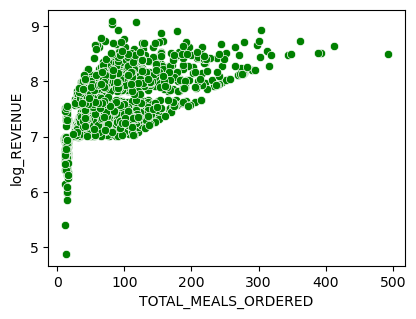

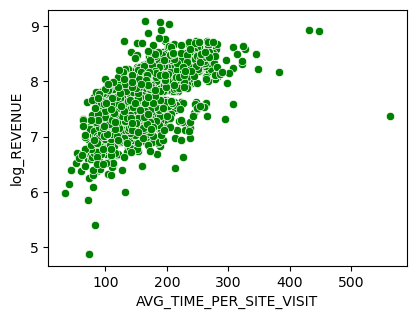

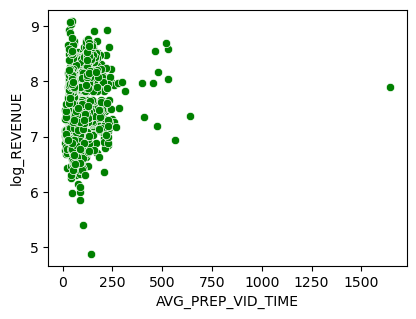

In [20]:
# looping through a list of variables to create scatter plots
for i in xlist:
    fig, ax = plt.subplots(figsize = (8, 6))


# creating a scatter plots y_variable = log_REVENUE
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = data[i],
                y = data['log_REVENUE'],
                color = 'g')


    plt.tight_layout()
    plt.show()

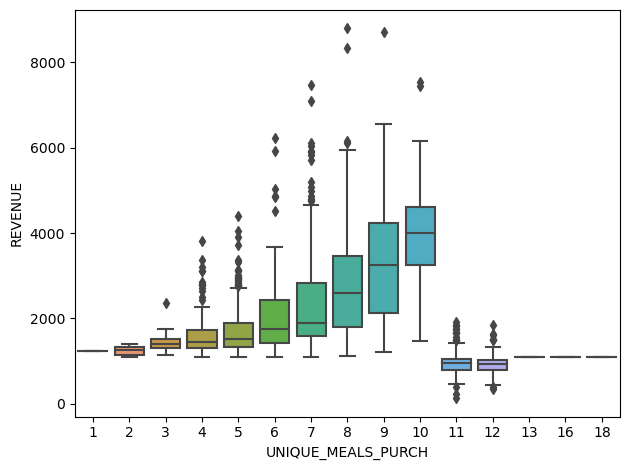

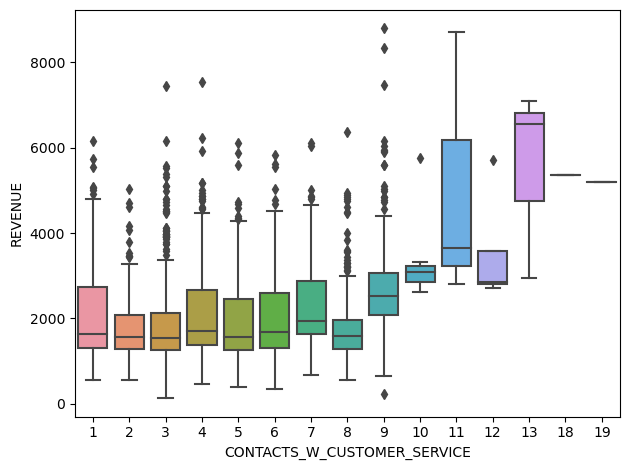

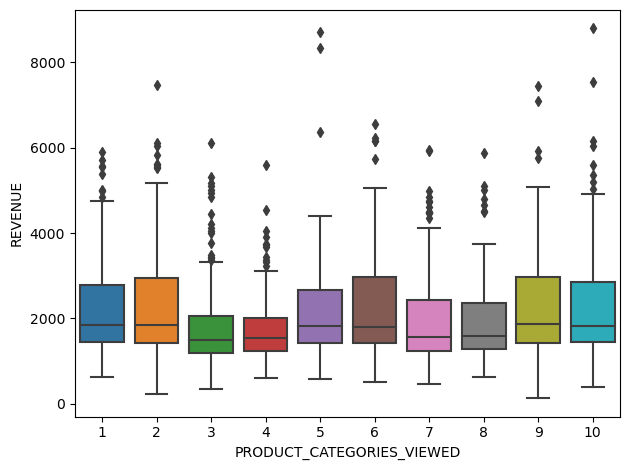

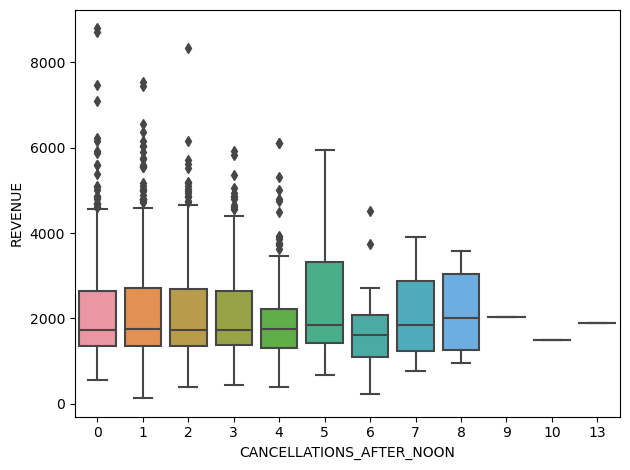

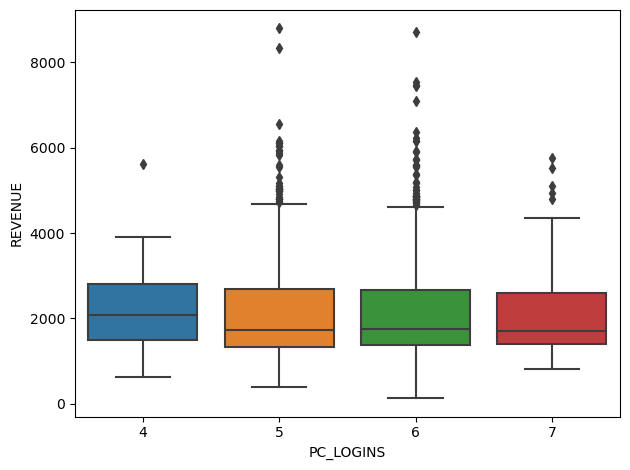

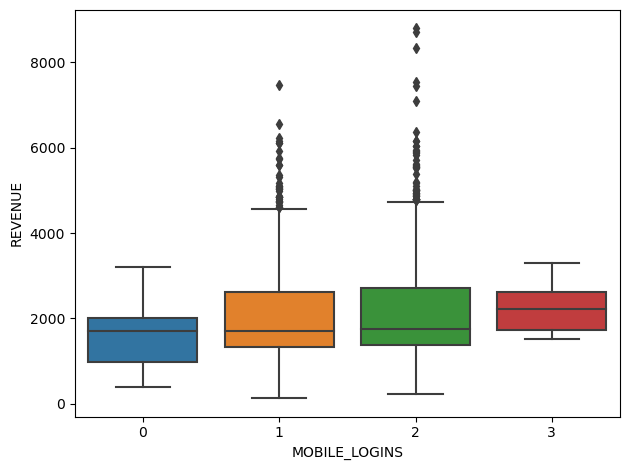

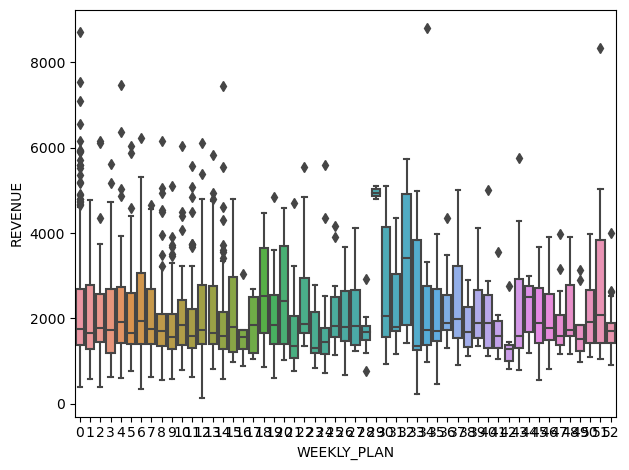

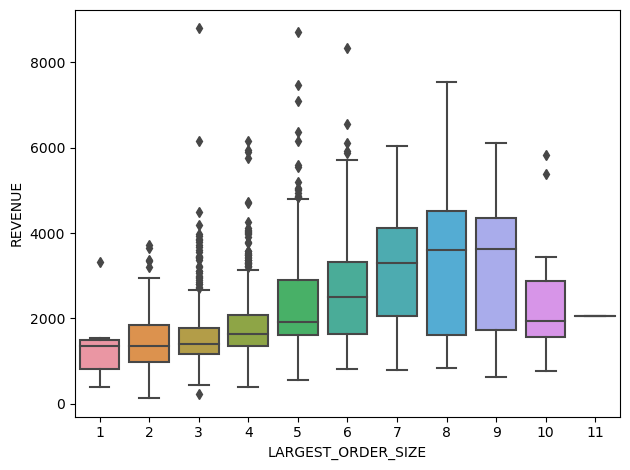

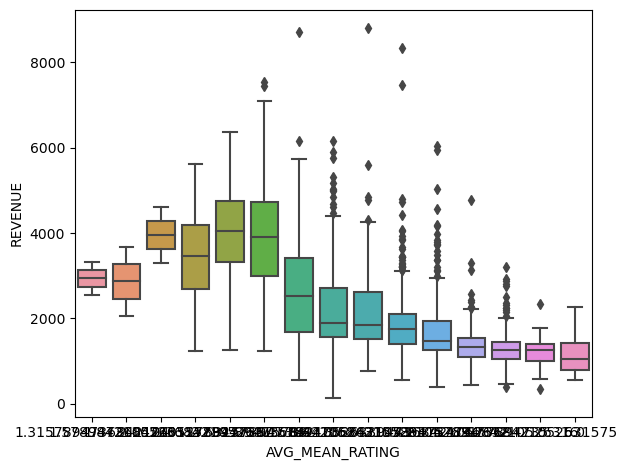

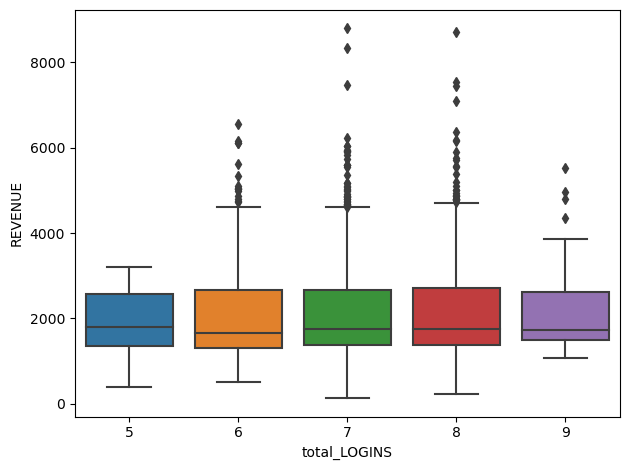

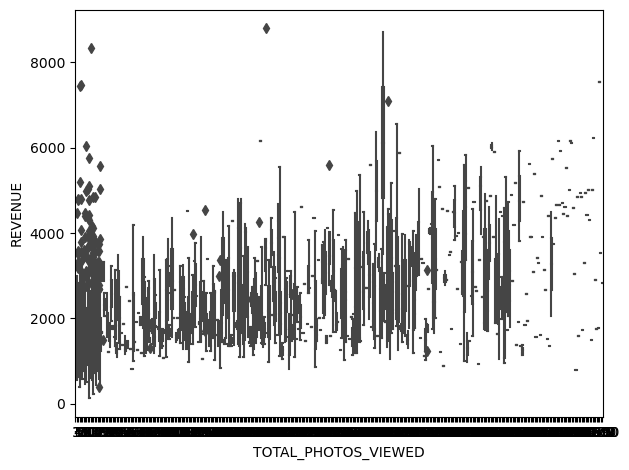

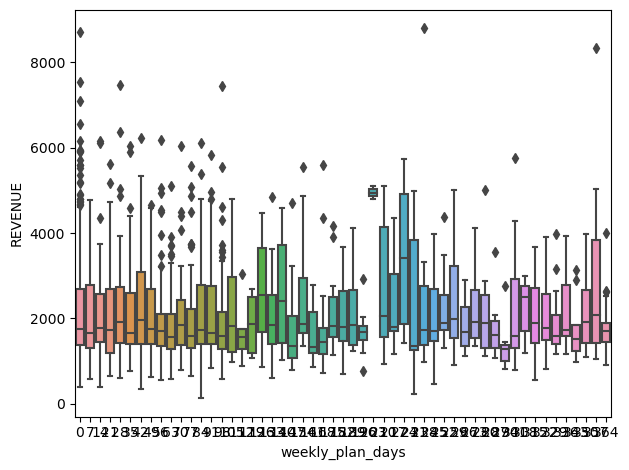

In [21]:
for i in xlist_count:
    sns.boxplot(x    = data[i],
            y    = 'REVENUE',
            data = data)




    plt.tight_layout()
# displaying the plot
    plt.show()

In [22]:
data.corr()['log_REVENUE']

REVENUE                             0.947122
TOTAL_MEALS_ORDERED                 0.609341
UNIQUE_MEALS_PURCH                 -0.036922
CONTACTS_W_CUSTOMER_SERVICE         0.179131
PRODUCT_CATEGORIES_VIEWED           0.036905
AVG_TIME_PER_SITE_VISIT             0.650876
CANCELLATIONS_AFTER_NOON           -0.002321
PC_LOGINS                           0.010751
MOBILE_LOGINS                       0.078481
WEEKLY_PLAN                         0.012456
LATE_DELIVERIES                    -0.034017
AVG_PREP_VID_TIME                   0.144359
LARGEST_ORDER_SIZE                  0.445519
AVG_MEAN_RATING                    -0.577814
TOTAL_PHOTOS_VIEWED                 0.427516
log_REVENUE                         1.000000
LATE_DELIVERIES                    -0.034017
AVERAGE_NUMBER_MEALS                0.445519
total_LOGINS                        0.060693
total_TIME_VISIT                    0.623395
meals_order                         0.397669
weekly_plan_days                    0.012456
nomal_orde

### Initiating the models

#### Lasso and OLS regression models are both linear regression models, but with different regularization techniques. Lasso regularization uses L1 regularization, while OLS regression uses OLS (Ordinary Least Squares) method. Linear Regression, on the other hand, is a simple linear regression model without any regularization.

#### I believe that trying all three models will give us a better understanding of the relationship between our predictor variables and the response variable (revenue). This will also help us in determining which model fits the data best and provides the most accurate predictions. Furthermore, it will also allow us to compare the results of different models and choose the one with the best performance.

In [23]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

In [24]:
# Instantiating a model object using the LinearRegression method from scikit-learn's linear_model module.
lm_price_qual = smf.ols(formula = """log_REVENUE ~ log_TOTAL_MEALS_ORDERED + 
                                                AVG_TIME_PER_SITE_VISIT +
                                                log_AVG_PREP_VID_TIME +
                                                log_photo_viewed_visit +
                                                log_num_photo_lead_order +
                                                rating_int +
                                                
                                                AVERAGE_NUMBER_MEALS +
                                                
                                                meals_order +
                                                
                                                has_CONTACTS_W_CUSTOMER_SERVICE +
                                               
                                                
                                                
                                                high_CONTACTS_W_CUSTOMER_SERVICE +
                                                has_WEEKLY_PLAN +
                                                no_WEEKLY_PLAN +
                                                
                                                
                                                
                                                played_PREP_VID 
                                                
                                                
                                                """,
                        data = data)


# Fitting the model to the training data using the fit method.
results = lm_price_qual.fit()


# printing OLS summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     423.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:26:48   Log-Likelihood:                -234.61
No. Observations:                1946   AIC:                             491.2
Df Residuals:                    1935   BIC:                             552.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [25]:
# Instantiating a model object using the LinearRegression method from scikit-learn's linear_model module.
lm_price_qual = smf.ols(formula = """log_REVENUE ~ log_TOTAL_MEALS_ORDERED + 
                                                AVG_TIME_PER_SITE_VISIT +
                                                log_AVG_PREP_VID_TIME +
                                                log_photo_viewed_visit +
                                                log_num_photo_lead_order +
                                                rating_int +
                                                log_photo_viewed_cat +
                                                AVERAGE_NUMBER_MEALS +
                                                total_TIME_VISIT +
                                                meals_order +
                                                
                                                has_CONTACTS_W_CUSTOMER_SERVICE +
                                                has_CANCELLATIONS_AFTER_NOON +
                                                has_LATE_DELIVERIES +
                                                
                                                
                                                high_CONTACTS_W_CUSTOMER_SERVICE +
                                                has_WEEKLY_PLAN +
                                                no_WEEKLY_PLAN +
                                                
                                               
                                                long_WEEKLY_PLAN +
                                                played_PREP_VID +
                                                
                                                
                                                UNIQUE_MEALS_PURCH +
                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                
                                                WEEKLY_PLAN +
                                                total_LOGINS 
                                                
                                                
                                                """,
                        data = data)


# Fitting the model to the training data using the fit method.
results = lm_price_qual.fit()


# printing OLS summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     242.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:26:48   Log-Likelihood:                -174.12
No. Observations:                1946   AIC:                             388.2
Df Residuals:                    1926   BIC:                             499.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [26]:
# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_REVENUE ~ log_TOTAL_MEALS_ORDERED + 
                                                AVG_TIME_PER_SITE_VISIT +
                                                log_AVG_PREP_VID_TIME +
                                                log_photo_viewed_visit +
                                                log_num_photo_lead_order +
                                                rating_int +
                                                log_photo_viewed_cat +
                                                AVERAGE_NUMBER_MEALS +
                                                total_TIME_VISIT +
                                                meals_order +
                                                nomal_order +
                                                has_CONTACTS_W_CUSTOMER_SERVICE +
                                                has_CANCELLATIONS_AFTER_NOON +
                                                has_LATE_DELIVERIES +
                                                
                                                high_CONTACTS_W_CUSTOMER_SERVICE +
                                                has_WEEKLY_PLAN +
                                                no_WEEKLY_PLAN +
                                                short_WEEKLY_PLAN +
                                                med_WEEKLY_PLAN +
                                                
                                                played_PREP_VID +
                                                photo_viewed_visit +
                                                num_photo_lead_order +
                                                UNIQUE_MEALS_PURCH +
                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                
                                                WEEKLY_PLAN +
                                                total_LOGINS +
                                                
                                                short_AVG_PREP_VID_TIME +
                                                med_AVG_PREP_VID_TIME +
                                                long_AVG_PREP_VID_TIME +
                                                out_AVG_PREP_VID_TIME +
                                                low_AVG_TIME_PER_SITE_VISIT +
                                                med_AVG_TIME_PER_SITE_VISIT +
                                                high_AVG_TIME_PER_SITE_VISIT +
                                                time_spent_cat +
                                                low_time_spent_cat +
                                                med_time_spent_cat +
                                                high_time_spent_cat
                                                
                                                """,
                        data = data)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:26:48   Log-Likelihood:                -131.19
No. Observations:                1946   AIC:                             330.4
Df Residuals:                    1912   BIC:                             519.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [27]:
# to try various combination of the x variable prepared number of list containing the x variable column names
#preparing x data
fullx = ["log_TOTAL_MEALS_ORDERED","log_UNIQUE_MEALS_PURCH","log_UNIQUE_MEALS_PURCH",
         "log_CONTACTS_W_CUSTOMER_SERVICE","log_AVG_TIME_PER_SITE_VISIT","log_CANCELLATIONS_AFTER_NOON",
         "log_WEEKLY_PLAN","log_AVG_PREP_VID_TIME","log_LARGEST_ORDER_SIZE","log_TOTAL_PHOTOS_VIEWED","total_LOGINS",
         "total_TIME_VISIT"]

anotherx = ["log_TOTAL_MEALS_ORDERED","log_UNIQUE_MEALS_PURCH",
         "log_CONTACTS_W_CUSTOMER_SERVICE","log_AVG_TIME_PER_SITE_VISIT",
         "log_AVG_PREP_VID_TIME","log_LARGEST_ORDER_SIZE","log_TOTAL_PHOTOS_VIEWED","total_LOGINS",
         "total_TIME_VISIT"]

anotherx2 = ["TOTAL_MEALS_ORDERED","AVG_TIME_PER_SITE_VISIT",
         "LARGEST_ORDER_SIZE","AVG_MEAN_RATING",
         "TOTAL_PHOTOS_VIEWED","log_AVG_TIME_PER_SITE_VISIT","log_LARGEST_ORDER_SIZE","log_TOTAL_PHOTOS_VIEWED",
         "total_TIME_VISIT"]

sx= ["log_TOTAL_MEALS_ORDERED", "AVG_TIME_PER_SITE_VISIT", "log_AVG_PREP_VID_TIME", 
        "log_photo_viewed_visit", "log_num_photo_lead_order", "rating_int", "AVERAGE_NUMBER_MEALS",
     "meals_order", "has_CONTACTS_W_CUSTOMER_SERVICE", "high_CONTACTS_W_CUSTOMER_SERVICE", "has_WEEKLY_PLAN",
                    "no_WEEKLY_PLAN", "played_PREP_VID"   ]

xxxx = ["log_TOTAL_MEALS_ORDERED","AVG_TIME_PER_SITE_VISIT" , "AVG_PREP_VID_TIME" ,
            "photo_viewed_visit" ,"num_photo_lead_order" , "rating_int" ,"photo_viewed_cat" ,
          "AVERAGE_NUMBER_MEALS" ,  "total_TIME_VISIT" , "meals_order" , "nomal_order" ,
          "has_CONTACTS_W_CUSTOMER_SERVICE" , "has_CANCELLATIONS_AFTER_NOON" ,"has_LATE_DELIVERIES" ,
           "low_CANCELLATIONS_AFTER_NOON" , "med_CANCELLATIONS_AFTER_NOON" , "high_CONTACTS_W_CUSTOMER_SERVICE" ,
          "has_WEEKLY_PLAN" ,  "no_WEEKLY_PLAN" , "short_WEEKLY_PLAN", "med_WEEKLY_PLAN" , "long_WEEKLY_PLAN" ,
           "played_PREP_VID" ,  "photo_viewed_visit" ,  "num_photo_lead_order" , "UNIQUE_MEALS_PURCH" ,
          "CONTACTS_W_CUSTOMER_SERVICE" ,      "PRODUCT_CATEGORIES_VIEWED" ,   "CANCELLATIONS_AFTER_NOON" ,
                 "WEEKLY_PLAN" ,  "total_LOGINS" ,    "LATE_DELIVERIES" ,    "short_AVG_PREP_VID_TIME" ,
           "med_AVG_PREP_VID_TIME" ,  "long_AVG_PREP_VID_TIME" ,               "out_AVG_PREP_VID_TIME" ,
            "low_AVG_TIME_PER_SITE_VISIT" ,     'med_AVG_TIME_PER_SITE_VISIT' ,  'high_AVG_TIME_PER_SITE_VISIT' ,
              'time_spent_cat' , "high_time_spent_cat" , "one_time_purchase" , "low_one_time_purchase" ,                      
                "high_one_time_purchase" ,  "low_TOTAL_PHOTOS_VIEWED" ,"high_TOTAL_PHOTOS_VIEWED", "very_TOTAL_PHOTOS_VIEWED"
        ]



In [28]:
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model
import statsmodels.formula.api as smf # regression modeling

In [29]:
# Selecting the x-variables
x_data = data.loc[ : , xxxx]

# Selecting the y-variable (log of revenue)
y_data = data.loc[ : , 'log_REVENUE']


# Splitting the data into training and testing datasets
# The training dataset will be used to fit the model
# The testing dataset will be used to evaluate the performance of the model
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables 
            y_data, # y-variable  
            test_size    = 0.25, # 25% of the data will be used for testing
            random_state = 219) # setting the random state to 219

In [30]:
help(sklearn.linear_model.LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [31]:
# Setting a model name
model_name = "Linear Regression"


# Instantiating a model object using the LinearRegression method from scikit-learn's linear_model module.
model = sklearn.linear_model.LinearRegression() # default parameter

# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)


# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)


# Calculating the R-square score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# Printing out the training and testing R-square scores and the train-test gap.
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7146
Testing Score  : 0.7121
Train-Test Gap : 0.0025


In [32]:
# Setting a model name
model_name = "Linear Regression"


# Instantiating a model object using the LinearRegression method from scikit-learn's linear_model module.
model = sklearn.linear_model.LinearRegression(fit_intercept= False, normalize= True,
                                             ) # The fit_intercept and normalize arguments are set to False and True respectively.


# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)


# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)


# Calculating the R-square score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# Printing out the training and testing R-square scores and the train-test gap.
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7146
Testing Score  : 0.7121
Train-Test Gap : 0.0025


C:\Users\hurge\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [33]:
help(sklearn.linear_model.Lasso())

Help on Lasso in module sklearn.linear_model._coordinate_descent object:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso).
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``

In [34]:
model_name = "lasso model"

# Instantiating a model object using the LinearRegression method from scikit-learn's linear_model module.
model = sklearn.linear_model.Ridge()


# Fitting the model to the training data using the fit method.
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7146
Testing Score  : 0.7122
Train-Test Gap : 0.0024


In [35]:
# Setting a model name
model_name = "lasso model"


# Instantiating a model object using the LinearRegression method from scikit-learn's linear_model module.
model = sklearn.linear_model.Lasso()


# Fitting the model to the training data using the fit method.

model_fit = model.fit(x_train, y_train)


# Making predictions on the test data using the predict method.
model_pred = model.predict(x_test)


# Calculating the R-square score for both training and testing data and storing it in the model_train_score and model_test_score variables respectively.
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# Printing out the training and testing R-square scores and the train-test gap.
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.5357
Testing Score  : 0.5126
Train-Test Gap : 0.0231


## Final Model : OLS Regression
#### The OLS regression results show that the model explains about 75% of the variance in the logarithmic transformation of revenue. The adjusted R-squared of 0.725 suggests that about 72.5% of the variance in the logarithmic transformation of revenue can be explained by the independent variables in the model after adjusting for the number of predictors.

#### The F-statistic of 31.01 with a p-value of 6.41e-98 is significant, indicating that the overall model is a good fit for the data.

#### The coefficients of the independent variables in the model suggest their relationship with the dependent variable, log_REVENUE. For example, the coefficient of the log_TOTAL_MEALS_ORDERED variable is 1.2036, meaning that for a unit increase in the logarithmic transformation of the total number of meals ordered, the logarithmic transformation of revenue is expected to increase by 1.2036 units, holding all other independent variables constant. Similarly, the coefficients of the other independent variables suggest their relationship with log_REVENUE.

In [36]:
# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_REVENUE ~ log_TOTAL_MEALS_ORDERED + 
                                                AVG_TIME_PER_SITE_VISIT +
                                                log_AVG_PREP_VID_TIME +
                                                log_photo_viewed_visit +
                                                log_num_photo_lead_order +
                                                rating_int +
                                                log_photo_viewed_cat +
                                                AVERAGE_NUMBER_MEALS +
                                                total_TIME_VISIT +
                                                meals_order +
                                                nomal_order +
                                                has_CONTACTS_W_CUSTOMER_SERVICE +
                                                has_CANCELLATIONS_AFTER_NOON +
                                                has_LATE_DELIVERIES +
                                                low_CANCELLATIONS_AFTER_NOON +
                                                med_CANCELLATIONS_AFTER_NOON +
                                                high_CONTACTS_W_CUSTOMER_SERVICE +
                                                has_WEEKLY_PLAN +
                                                no_WEEKLY_PLAN +
                                                short_WEEKLY_PLAN +
                                                med_WEEKLY_PLAN +
                                                long_WEEKLY_PLAN +
                                                played_PREP_VID +
                                                photo_viewed_visit +
                                                num_photo_lead_order +
                                                UNIQUE_MEALS_PURCH +
                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                PRODUCT_CATEGORIES_VIEWED +
                                                CANCELLATIONS_AFTER_NOON +
                                                WEEKLY_PLAN +
                                                total_LOGINS +
                                                LATE_DELIVERIES +
                                                short_AVG_PREP_VID_TIME +
                                                med_AVG_PREP_VID_TIME +
                                                long_AVG_PREP_VID_TIME +
                                                out_AVG_PREP_VID_TIME +
                                                low_AVG_TIME_PER_SITE_VISIT +
                                                med_AVG_TIME_PER_SITE_VISIT +
                                                high_AVG_TIME_PER_SITE_VISIT +
                                                time_spent_cat +                                                
                                                high_time_spent_cat +
                                                one_time_purchase +
                                                low_one_time_purchase +                                                
                                                high_one_time_purchase +                                                
                                                very_time_spent_cat +
                                                low_TOTAL_PHOTOS_VIEWED +
                                                med_TOTAL_PHOTOS_VIEWED +
                                                high_TOTAL_PHOTOS_VIEWED +
                                                very_TOTAL_PHOTOS_VIEWED
                                                
                                                """,
                        data = data)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     31.01
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           6.41e-98
Time:                        21:26:49   Log-Likelihood:                 12.576
No. Observations:                 444   AIC:                             54.85
Df Residuals:                     404   BIC:                             218.7
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep